In [1]:
!pip install tensorflow==2.1

import tensorflow as tf

print(tf.__version__)
tf.config.list_physical_devices('GPU')

2.1.0


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [2]:
dir(tf.keras.datasets)

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(type(x_train), x_train.shape, y_train.shape, x_test.shape, y_test.shape)

<class 'numpy.ndarray'> (60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


The label is  5


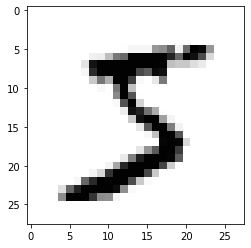

In [3]:
import matplotlib.pyplot as plt

image_index = 0
print("The label is ", y_train[image_index])

plt.imshow(x_train[image_index], cmap='Greys')
plt.show()

In [4]:
import numpy as np

x_train = np.pad(x_train, ((0, 0), (2, 2), (2, 2)), 'constant', constant_values=0)
x_test = np.pad(x_test, ((0, 0), (2, 2), (2, 2)), 'constant', constant_values=0)
print(type(x_train), x_train.shape, x_test.shape)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

x_train = x_train.reshape(x_train.shape[0], 32, 32, 1)
x_test = x_test.reshape(x_test.shape[0], 32, 32, 1)
print (type(x_train), x_train.shape, x_test.shape)

<class 'numpy.ndarray'> (60000, 32, 32) (10000, 32, 32)
<class 'numpy.ndarray'> (60000, 32, 32, 1) (10000, 32, 32, 1)


In [0]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(filters=6, kernel_size=(5, 5), padding='valid', activation=tf.nn.relu, input_shape=(32,32,1)))
model.add(tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))

model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(5, 5), padding='valid', activation=tf.nn.relu))
model.add(tf.keras.layers.AveragePooling2D(pool_size=(2, 2), strides=(2,2), padding='same'))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(units=120, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=84, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=10, activation=tf.nn.softmax))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [0]:
num_epochs = 10
batch_size = 64
learning_rate = 0.001

adam_optimizer = tf.keras.optimizers.Adam(learning_rate)

model.compile(optimizer=adam_optimizer, 
              loss=tf.keras.losses.sparse_categorical_crossentropy, 
              metrics=['accuracy'])

In [8]:
import time

time_start = time.time()

model.fit(x=x_train, y=y_train, 
          batch_size=batch_size, epochs=num_epochs)

time_end = time.time()

time_cost = time_end - time_start
print("time_cost = ", time_cost)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 10s 165us/sample - loss: 0.2920 - accuracy: 0.9127
Epoch 2/10
60000/60000 [==============================] - 3s 56us/sample - loss: 0.0851 - accuracy: 0.9741
Epoch 3/10
60000/60000 [==============================] - 3s 52us/sample - loss: 0.0601 - accuracy: 0.9810
Epoch 4/10
60000/60000 [==============================] - 3s 51us/sample - loss: 0.0477 - accuracy: 0.9850
Epoch 5/10
60000/60000 [==============================] - 3s 52us/sample - loss: 0.0384 - accuracy: 0.9877
Epoch 6/10
60000/60000 [==============================] - 3s 52us/sample - loss: 0.0324 - accuracy: 0.9895
Epoch 7/10
60000/60000 [==============================] - 3s 56us/sample - loss: 0.0291 - accuracy: 0.9908
Epoch 8/10
60000/60000 [==============================] - 3s 52us/sample - loss: 0.0232 - accuracy: 0.9921
Epoch 9/10
60000/60000 [==============================] - 3s 50us/sample - loss: 0.0211 - accuracy: 0.9932
Epoch 10/10


In [13]:
from google.colab import drive
drive.mount('/gdrive')
model.save('/gdrive/My Drive/Colab Models/mnist_lenet_model.h5')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [21]:
model = tf.keras.models.load_model('/gdrive/My Drive/Colab Models/mnist_lenet_model.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

0 (32, 32, 1)


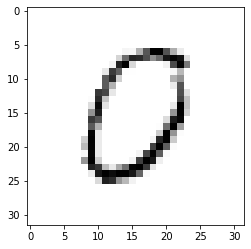

In [16]:
image_index = 2333
print(y_test[image_index], x_test[image_index].shape)

plt.imshow(x_test[image_index].reshape(32, 32), cmap='Greys')

In [19]:
pred = model.predict(x_test[image_index].reshape(1, 32, 32, 1))
print(pred.argmax(), pred)

0 [[9.9922323e-01 2.4557442e-06 9.8672324e-05 2.5490064e-07 1.8614956e-09
  1.7478648e-07 2.5076279e-06 1.1662966e-06 3.1015861e-07 6.7115156e-04]]


In [20]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 79us/sample - loss: 0.0302 - accuracy: 0.9896


[0.03015477242090601, 0.9896]

In [38]:
import cv2

img = cv2.imread('/gdrive/My Drive/Colab Files/mnist_lenet_model_test_3.jpg')
print(img.shape)

(579, 475, 3)


(579, 475)


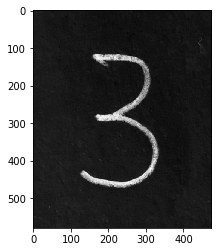

In [39]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(img.shape)

plt.imshow(img, cmap='Greys')

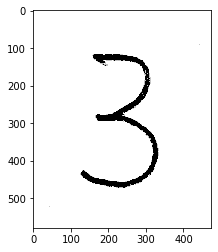

In [40]:
img = cv2.bitwise_not(img)
img[img <= 80] = 0
img[img > 100] = 255

plt.imshow(img, cmap='Greys')

In [41]:
img = cv2.resize(img,(32,32))
img = img.astype('float32')
img /= 255
img = img.reshape(1, 32, 32, 1)
print(img.shape)

(1, 32, 32, 1)


In [42]:
pred = model.predict(img)
print(pred.argmax(), pred)

3 [[2.9857862e-08 5.0874604e-07 1.1082127e-06 9.9986923e-01 5.3740823e-08
  5.1210383e-05 3.5570393e-09 1.8816567e-07 6.7238048e-05 1.0366434e-05]]


In [43]:
img = cv2.imread('/gdrive/My Drive/Colab Files/mnist_lenet_model_test_7.jpg')
print(img.shape)

(921, 469, 3)


(921, 469)


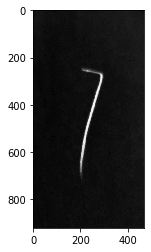

In [44]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(img.shape)

plt.imshow(img, cmap='Greys')

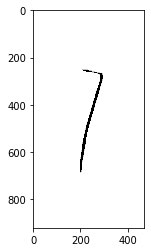

In [45]:
img = cv2.bitwise_not(img)
img[img <= 80] = 0
img[img > 100] = 255

plt.imshow(img, cmap='Greys')

In [46]:
img = cv2.resize(img,(32,32))
img = img.astype('float32')
img /= 255
img = img.reshape(1, 32, 32, 1)
print(img.shape)

(1, 32, 32, 1)


In [47]:
pred = model.predict(img)
print(pred.argmax(), pred)

1 [[0.012637   0.8080026  0.00979938 0.00477797 0.0321393  0.01162912
  0.03418852 0.00852637 0.04424768 0.03405198]]
